In [32]:
from LensCalcPy.survey import *
from LensCalcPy.ffp import *
from LensCalcPy.utils import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d, interp2d
from scipy.integrate import quad, nquad
from tqdm import tqdm
from pathos.multiprocessing import ProcessingPool as Pool
import functools
from scipy.stats import poisson
import seaborn as sns
sns.set_palette("colorblind")
from LensCalcPy.parameters import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
s = Survey(l, b, ds, obsTime, survey_area=survey_area, n_sources=n_sources)
s

Survey(l=1.0, b=-1.03, source_dist=9.0, obs_time=43800, survey_area=0.16)

In [34]:
m_pbh = 1e-3
f_dm = 1
s.add_pbh(m_pbh, f_dm)

In [28]:
t_es = np.logspace(-2, 4, 50)

In [29]:
pbh_rates = s.get_crossing_times_rates_pbh(t_es, finite=True)

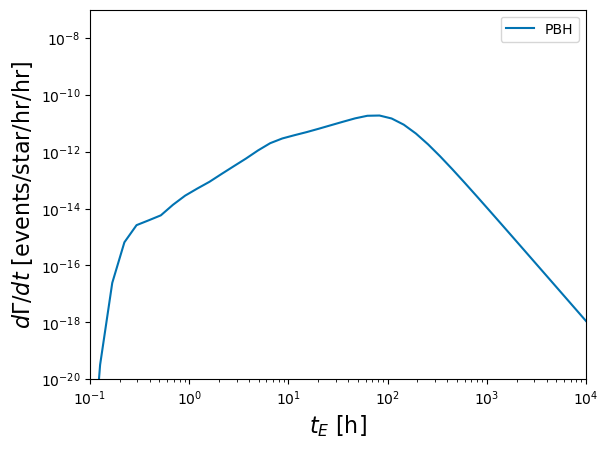

In [30]:
plt.loglog(t_es, pbh_rates, label="PBH")

plt.xlabel(r"$t_E$ [h]", fontsize=16)
plt.ylabel(r"$d\Gamma/dt$ [events/star/hr/hr]", fontsize=16)

plt.xlim(1e-1, 1e4)
plt.ylim(1e-20, 1e-7)

plt.legend()
plt.show()

In [35]:
events_pbh = s.get_events_observed_pbh(t_es, finite=True)

In [59]:
np.sum(events_pbh) 

34421.30086125325

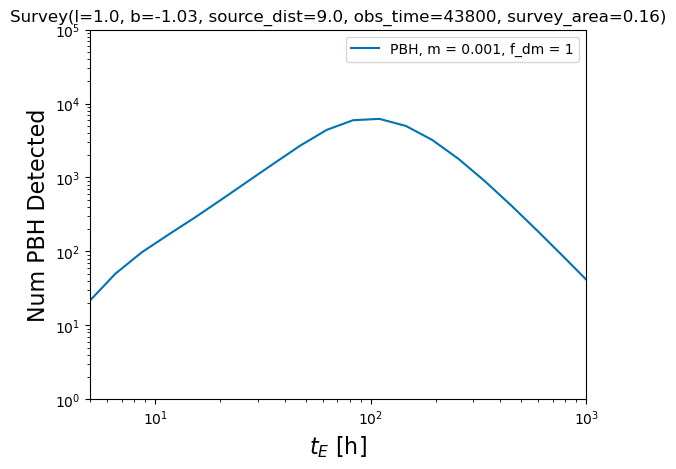

In [58]:
plt.loglog(t_es,events_pbh, label="PBH, m = {}, f_dm = {}".format(m_pbh, f_dm))

plt.ylim(1e0, 1e5)
plt.xlim(5e0, 1e3)

plt.xlabel(r"$t_E$ [h]", fontsize=16)
plt.ylabel("Num PBH Detected", fontsize=16)
plt.title(s)
plt.legend()
plt.show()